# Image fussion

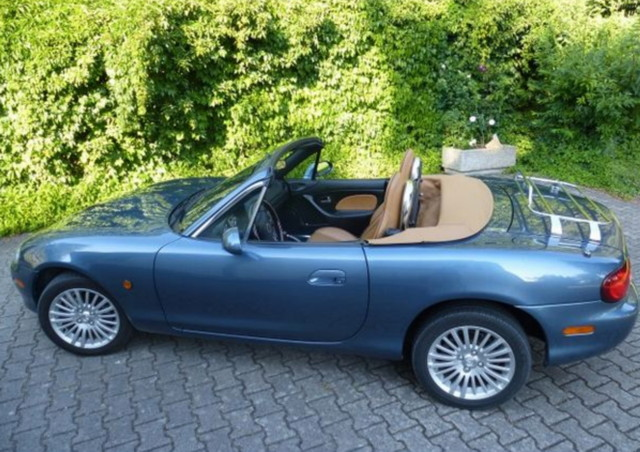

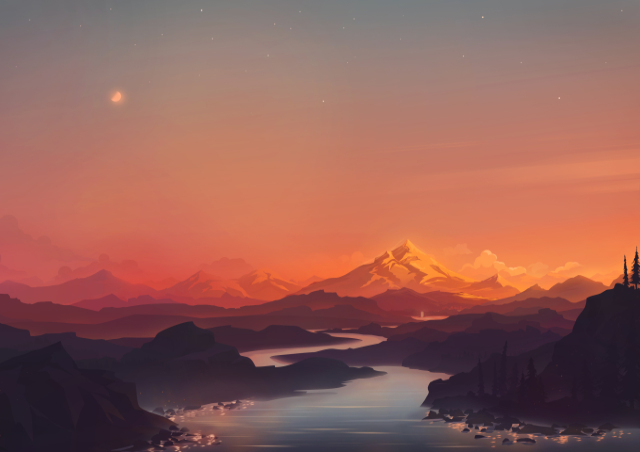

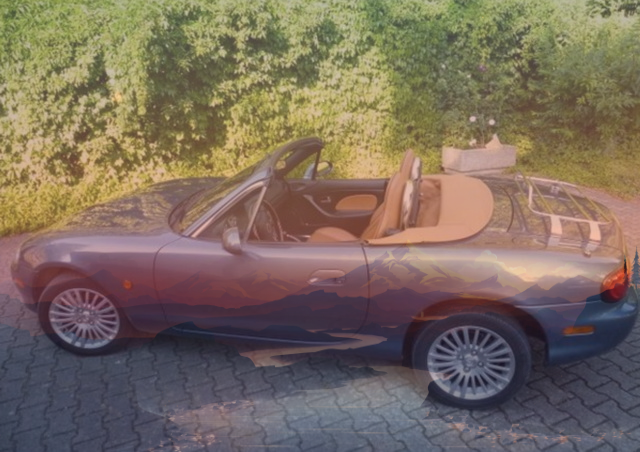

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load your two input images
image1 = cv2.imread('image_.jpg')
image2 = cv2.imread('image_1.jpg')

# Resize images to the same dimensions (if needed)
if image1.shape != image2.shape:
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Perform simple average fusion
fused_image = cv2.addWeighted(image1, 0.5, image2, 0.5, 0)

# Save the fused image
cv2.imwrite('fused_image.jpg', fused_image)

# Display the fused image (optional)
cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(fused_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Overlapping images

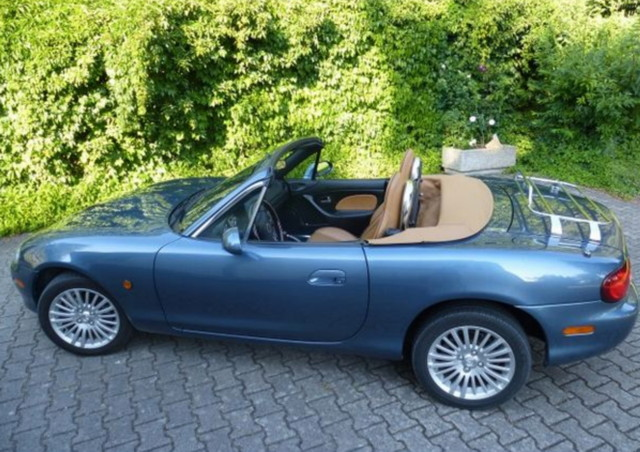

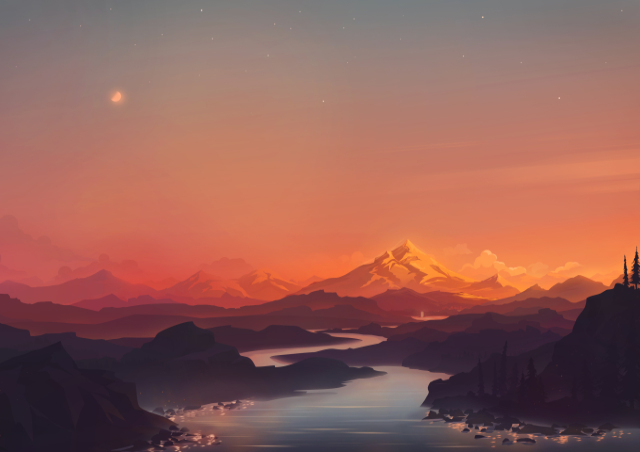

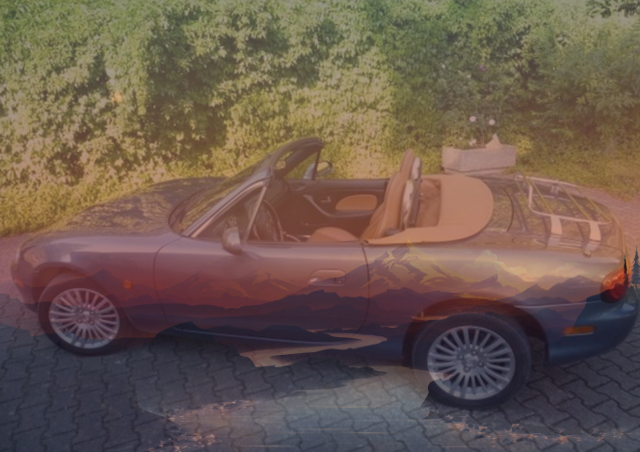

In [38]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load your two input images
image1 = cv2.imread('image_.jpg')
image2 = cv2.imread('image_1.jpg')

# Resize images to the same dimensions (if needed)
if image1.shape != image2.shape:
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Perform simple average fusion
fused_image = cv2.addWeighted(image1, 0.35, image2, 0.5, 0)

# Save the fused image
cv2.imwrite('fused_image.jpg', fused_image)

# Display the fused image (optional)
cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(fused_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Separate Fused images

### Attempts to separate fused images

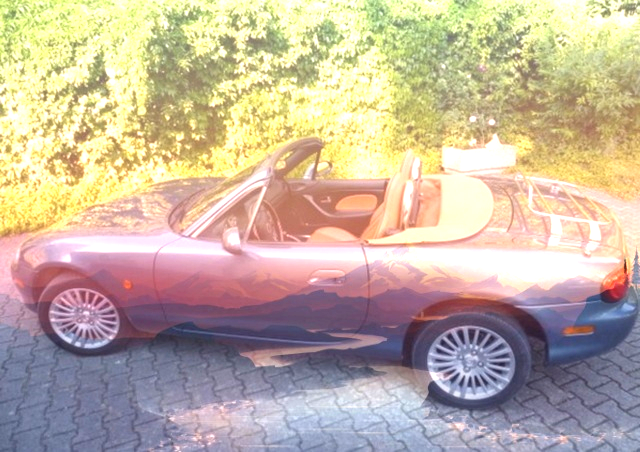

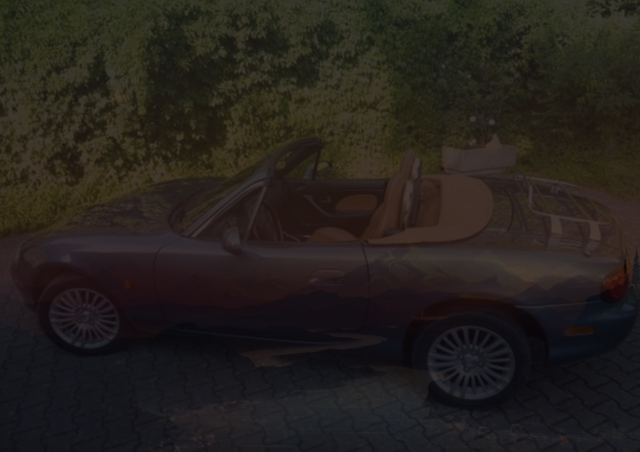

In [20]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the fused image
fused_image = cv2.imread('/content/fused_image.jpg')

# Split the fused image into its original components
alpha = 0.5  # The same alpha used for fusion
image1_recovered = cv2.addWeighted(fused_image, 2.0 - 0.3, np.zeros_like(fused_image), 0, 0)
image2_recovered = cv2.addWeighted(fused_image, 0.3, np.zeros_like(fused_image), 0, 0)

# Display the recovered original images
cv2_imshow(image1_recovered)
cv2_imshow(image2_recovered)

# Save the recovered original images
cv2.imwrite('image1_recovered.jpg', image1_recovered)
cv2.imwrite('image2_recovered.jpg', image2_recovered)

cv2.waitKey(0)
cv2.destroyAllWindows()


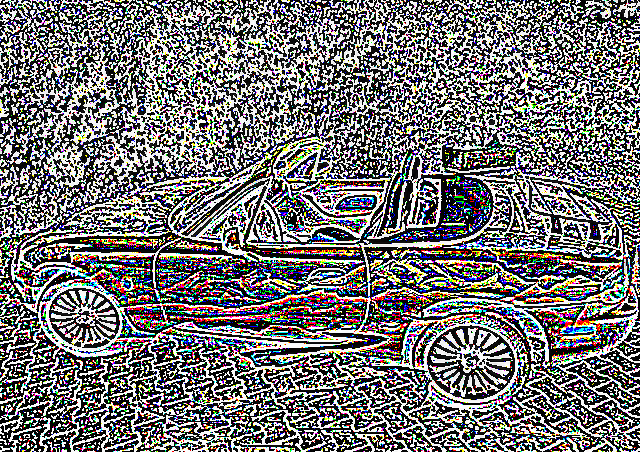

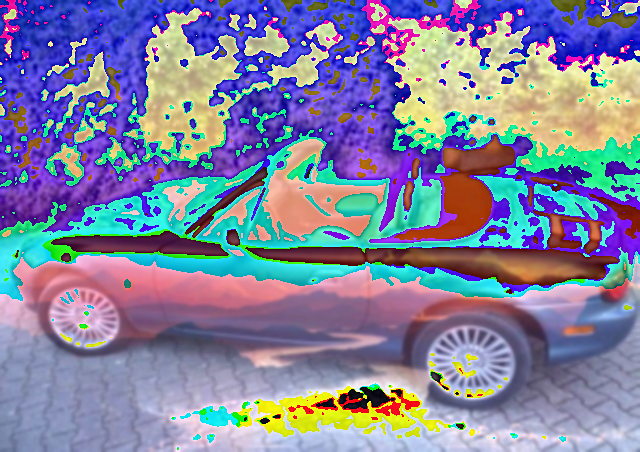

In [16]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the fused image
fused_image = cv2.imread('/content/fused_image.jpg')

# Split the fused image into its original components
alpha = 0.5  # The same alpha used for fusion

# Apply Laplacian pyramid fusion to recover the original images
pyr_down = cv2.pyrDown(fused_image)
pyr_up = cv2.pyrUp(pyr_down)
image1_recovered = (fused_image - pyr_up).astype(np.uint8)
image2_recovered = ((fused_image - image1_recovered) / alpha).astype(np.uint8)

# Display the recovered original images
cv2_imshow(image1_recovered)
cv2_imshow(image2_recovered)

# Save the recovered original images
cv2.imwrite('image1_recovered.jpg', image1_recovered)
cv2.imwrite('image2_recovered.jpg', image2_recovered)

cv2.waitKey(0)
cv2.destroyAllWindows()


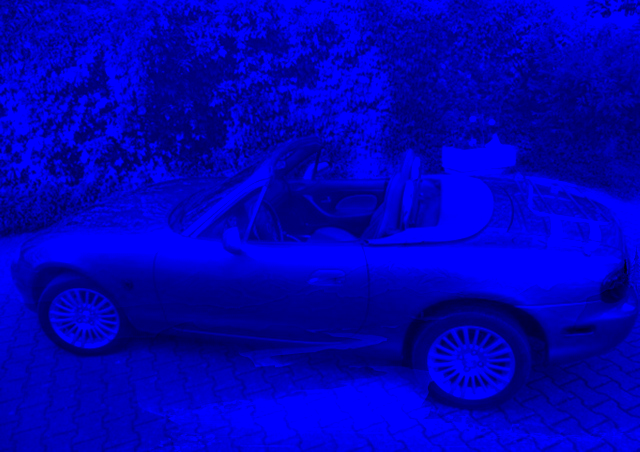

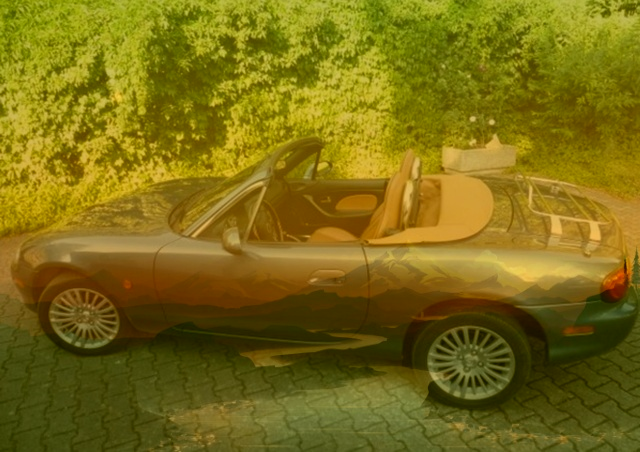

In [37]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the fused image
fused_image = cv2.imread('/content/fused_image.jpg')

# Calculate the inverse of the fusion process (approximate original images)
approx_image1 = cv2.multiply(fused_image, 2)
#approx_image2 = cv2.multiply(fused_image, 0.5)
approx_image2 = cv2.subtract(fused_image, 80)

# Display the approximate original images
cv2_imshow(approx_image1)
cv2_imshow(approx_image2)

# Save the approximate original images
cv2.imwrite('approx_image1.jpg', approx_image1)
cv2.imwrite('approx_image2.jpg', approx_image2)

cv2.waitKey(0)
cv2.destroyAllWindows()
